<a href="https://colab.research.google.com/github/pathilink/sp_global_bootcamp/blob/main/5_exercicio_teste_hipotese/exercicio_teste_hipotese.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercício Teste de Hipóteses

## Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
from statsmodels.stats.power import NormalIndPower
from statsmodels.stats.proportion import proportion_effectsize
from scipy.stats import chi2_contingency
from scipy.stats import pearsonr
from scipy.stats import t
from scipy.stats import shapiro

## Dados

### Experimento

In [2]:
df_experimento = pd.read_csv('/content/drive/MyDrive/WoMakersCode/Bootcamp S&P Global/Teste de Hipótese/experimento_teste_ab.csv')
df_experimento.head()

,Visitante_ID,Versão_Página,Visualizações,Conversões
0,1,A,167,1
1,2,A,160,0
2,3,A,170,0
3,4,A,161,1
4,5,A,104,0


In [3]:
df_experimento.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Visitante_ID   2000 non-null   int64 
 1   Versão_Página  2000 non-null   object
 2   Visualizações  2000 non-null   int64 
 3   Conversões     2000 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 62.6+ KB


In [4]:
# converter colunas numéricas para categóricas
df_experimento['Visitante_ID'] = df_experimento['Visitante_ID'].astype('object')
# df_experimento['Conversões'] = df_experimento['Conversões'].astype('object')

In [5]:
df_experimento[['Visitante_ID', 'Conversões']].dtypes


,0
Visitante_ID,object
Conversões,int64


In [6]:
df_experimento['Visualizações'].describe()

,Visualizações
count,2000.000000
mean,150.755500
std,28.809421
min,100.000000
25%,126.000000
50%,151.000000
75%,175.000000
max,199.000000


In [7]:
df_experimento['Versão_Página'].unique()

array(['A', 'B'], dtype=object)

In [8]:
df_experimento['Conversões'].unique()

array([1, 0])

### Pacientes

In [9]:
df_pacientes = pd.read_csv('/content/drive/MyDrive/WoMakersCode/Bootcamp S&P Global/Teste de Hipótese/pacientes.csv', index_col=0)
df_pacientes.head()

,Pressao_Arterial,Idade,Genero,Etnia,Estado_Saude,Nome_Genero,Nome_Etnia,Nome_Estado_Saude
0,142.755809,31,1,1,1,Feminino,Afro-americano,Com condições de saúde adicionais
1,161.878468,35,1,1,0,Feminino,Afro-americano,Saudável
2,161.508259,39,0,3,1,Masculino,Asiático,Com condições de saúde adicionais
3,144.979408,43,1,3,1,Feminino,Asiático,Com condições de saúde adicionais
4,162.502954,55,0,2,1,Masculino,Hispânico,Com condições de saúde adicionais


In [10]:
df_pacientes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Pressao_Arterial   1000 non-null   float64
 1   Idade              1000 non-null   int64  
 2   Genero             1000 non-null   int64  
 3   Etnia              1000 non-null   int64  
 4   Estado_Saude       1000 non-null   int64  
 5   Nome_Genero        1000 non-null   object 
 6   Nome_Etnia         1000 non-null   object 
 7   Nome_Estado_Saude  1000 non-null   object 
dtypes: float64(1), int64(4), object(3)
memory usage: 70.3+ KB


## Questões - Teste AB

### 1.
Qual dos cenários tem a maior taxa de conversão?

In [11]:
df_experimento.groupby('Versão_Página')['Conversões'].count()

,Conversões
Versão_Página,
A,1000
B,1000


In [12]:
df_experimento.groupby('Versão_Página')['Conversões'].sum()

,Conversões
Versão_Página,
A,105
B,125


<font color=blue>
A página com a versão B apresentou a maior taxa de conversão: 12,5%.
</font>

### 2.
Calcule qual o tamanho da amostra necessária para o desenvolvimento
de um teste A/B, seguindo os seguintes critérios:

a. O cenário A, da base, como o inicial, que funciona hoje.

b. Considere 95% de confiança de que o efeito na conversão não foi aleatório com um nível de significância de 5% (alpha = 0,05).

c. Também considere 80% de certeza conseguir capturar o efeito da nova abordagem.

d. O aumento para 10% de conversão.

In [13]:
total_conversions = df_experimento['Conversões'].sum()
print(f'Conversões: {total_conversions}')

total_views = df_experimento['Visualizações'].sum()
print(f'Visualizações: {total_views}')

Conversões: 230
Visualizações: 301511


In [14]:
# taxa de conversão baseline
p1 = total_conversions / total_views
print(f'Taxa de conversão: {p1}')

p2 = 0.10  # taxa esperada (nova versão)
print(f'Taxa de conversão esperada: {p2}')

Taxa de conversão: 0.0007628245735644803
Taxa de conversão esperada: 0.1


In [15]:
# tamanho do efeito
effect_size = proportion_effectsize(p1, p2)
print(f'Tamanho do efeito: {effect_size}')

Tamanho do efeito: -0.588255525453917


<font color=blue>
**Comparar duas proporções** — a taxa de conversão atual (p1) e a taxa de conversão esperada (p2).
<br><br>
O proportion_effectsize(p1, p2) transforma a diferença entre duas taxas de conversão (proporções) em uma medida estatística padronizada.

<li>Queremos saber se a diferença entre p1 e p2 é "grande o suficiente" para ser detectável com uma determinada confiança e poder estatístico.</li>

<li>O tamanho da amostra necessária depende muito disso. Se a diferença for pequena, você precisa de uma amostra maior para ter certeza de que ela não aconteceu por acaso.</li>
<br>
Interpretação do resultado:
<li>O número -0.588 veio da fórmula de Cohen’s h, que compara duas proporções (p1 e p2) usando arcoseno.
<br>
<li>O sinal negativo indica que a taxa de conversão esperada (p2 = 10%) é maior do que a taxa atual (p1), ou seja: estamos testando um aumento de conversão.
<li>A magnitude (valor absoluto) do efeito é |−0.588| = 0.588, o que é considerado um efeito de tamanho médio a grande.
<li>Com 0.588, o experimento tem diferença razoavelmente detectável entre as versões, então não vai exigir uma amostra gigante, mas ainda é algo que requer um bom número de visitantes para confirmar.
</font>

|Valor de Cohen’s h (tamanho do efeito) | Interpretação |
|-|-|
| 0.2 | Pequeno |
| 0.5 | Médio |
| 0.8 | Grande |

<font color=blue>
A fórmula de Cohen's utilizada para calcular o tamanho do efeito entre duas proporções \( p_1 \) e \( p_2 \) é:
</font>

$$
h = 2 \cdot \arcsin\left(\sqrt{p_1}\right) - 2 \cdot \arcsin\left(\sqrt{p_2}\right)
$$

<font color=blue>
Onde:
- \( p_1 \) é a proporção (taxa de conversão) do grupo controle (versão A),
- \( p_2 \) é a proporção esperada do grupo teste (versão B),
- \( h \) é o tamanho do efeito padronizado (Cohen's *h*).
</font>

In [16]:
# parâmetros para o cálculo
alpha = 0.05  # significância
power = 0.80  # poder do teste

In [17]:
# cálculo
analysis = NormalIndPower()
sample_size = analysis.solve_power(effect_size=effect_size, power=power, alpha=alpha, ratio=1, alternative='two-sided')

sample_size_per_group = int(round(sample_size))

print(f'{sample_size_per_group} é o número mínimo de visitantes únicos por grupo (A e B) para testar se a taxa de conversão realmente subiu para 10% com 95% de confiança e 80% de poder estatístico.)')

45 é o número mínimo de visitantes únicos por grupo (A e B) para testar se a taxa de conversão realmente subiu para 10% com 95% de confiança e 80% de poder estatístico.)


## Questões - Pacientes

Considere a base como a população, portanto as estatísticas da população são conhecidas.

Obs.: Como o dado Pressao_Arterial está sendo utilizado como um valor único, podemos supor que ou é a PAM ou um valor fixo (sistólica ou diastólica).

### 3.

Considerando uma amostra de 45 números que representam o index do dataframe, índices= ([909, 751, 402, 400, 726, 39, 184, 269, 255, 769, 209, 715, 677, 381, 793, 697, 89, 280, 232, 756, 358, 36, 439, 768, 967, 699, 473, 222, 89, 639, 883, 558, 757, 84, 907, 895, 217, 224, 311, 348, 146, 505, 273, 957, 362]). Considerando essa amostra é possível dizer que a idade média das pessoas com problemas cardíacos é maior que 50 anos? Nível de significância igual a 5%.

<font color=blue>
<li>H0: A média de idade das pessoas com problemas cardíacos é menor ou igual a 50 anos.
<li>H1: A média de idade das pessoas com problemas cardíacos é maior que 50 anos.
</font>

In [18]:
indices3 = [909, 751, 402, 400, 726, 39, 184, 269, 255, 769,
            209, 715, 677, 381, 793, 697, 89, 280, 232, 756,
            358, 36, 439, 768, 967, 699, 473, 222, 89, 639,
            883, 558, 757, 84, 907, 895, 217, 224, 311, 348,
            146, 505, 273, 957, 362]

amostra3 = df_pacientes.loc[indices3]


In [19]:
# filtra quem tem problema cardíaco
amostra_problemas_cardiacos = amostra3[amostra3["Estado_Saude"] == 1]

# Teste t unilateral (média > 50 anos)
# H0: média <= 50
# H1: média > 50
media_amostra = amostra_problemas_cardiacos["Idade"].mean()
n = len(amostra_problemas_cardiacos)
t_stat, p_valor_bilateral = stats.ttest_1samp(amostra_problemas_cardiacos["Idade"], popmean=50)

# Como o teste é unilateral (cauda direita), dividimos o p-valor bilateral por 2
p_valor_unilateral = p_valor_bilateral / 2

# Mostrar resultado
print(f"Média da amostra: {media_amostra:.2f}")
print(f"T-stat: {t_stat:.4f}")
print(f"P-valor unilateral: {p_valor_unilateral:.4f}")

# Conclusão
alpha = 0.05
if (t_stat > 0) and (p_valor_unilateral < alpha):
    print("Rejeitamos H0: evidências de que a idade média > 50 anos.")
else:
    print("Não rejeitamos H0: sem evidências suficientes de que a idade média > 50 anos.")

Média da amostra: 48.16
T-stat: -0.6665
P-valor unilateral: 0.2568
Não rejeitamos H0: sem evidências suficientes de que a idade média > 50 anos.


### 4.
Queremos entender que tipo de amostra estamos lidando se dividirmos os conjuntos em 2, sendo um com pessoas que têm condições de saúde adicionais e o outro com pessoas saudáveis. Seria dependente ou independente?

<font color=blue>
Dividir os dados em dois grupos:
<li>Grupo 1: pessoas com condições de saúde adicionais (Estado_Saude == 1)
<li>Grupo 0: pessoas saudáveis (Estado_Saude == 0)
<br><br>
Esses dois grupos:
<li>Não são formados pelas mesmas pessoas antes/depois de algum tratamento.
<li>Não são pareados por características individuais.
<li>Foram selecionados de maneira independente, a partir de uma amostra aleatória de pessoas.
<br><br>
Conclusão:
<li>Esses dois subconjuntos representam amostras independentes.
</font>

### 5.
Agora considere o um conjunto de pessoas aleatória que representam o index do dataframe, índices = ([690, 894, 67, 201, 364, 19, 60, 319, 588, 643, 855, 623, 530, 174, 105, 693, 6, 462, 973, 607, 811, 346, 354, 966, 943, 372]), podemos dizer que a pressão arterial média para
pacientes com condições de saúde adicionais é igual à pressão arterial média para pacientes sem condições adicionais de saúde? Considere o nível de significância a 6%.

<font color=blue>
Teste de hipótese para comparação de médias de dois grupos independentes
<li>H0: A média da pressão arterial é igual entre os dois grupos.
𝜇1 = 𝜇0
<li>H1: A média da pressão arterial é diferente entre os dois grupos. 𝜇1 ≠ 𝜇0
<br><br>
Onde:
<li>𝜇1: média para pacientes com Estado_Saude == 1
<li>𝜇0: média para pacientes com Estado_Saude == 0
</font>

In [20]:
# Índices da nova amostra
amostra5 = [690, 894, 67, 201, 364, 19, 60, 319, 588, 643, 855, 623,
            530, 174, 105, 693, 6, 462, 973, 607, 811, 346, 354, 966,
            943, 372]

# Selecionar a amostra
amostra5_ = df_pacientes.loc[amostra5]

# Dividir em dois grupos
grupo_saude = amostra5_[amostra5_["Estado_Saude"] == 0]["Pressao_Arterial"]
grupo_condicao = amostra5_[amostra5_["Estado_Saude"] == 1]["Pressao_Arterial"]

# Teste t para amostras independentes (bilateral, variâncias diferentes)
t_stat, p_valor = stats.ttest_ind(grupo_condicao, grupo_saude, equal_var=False)

print(f"T-stat: {t_stat:.4f}")
print(f"P-valor: {p_valor:.4f}")

# Nível de significância
alpha = 0.06
if p_valor < alpha:
    print("Rejeitamos H0: as médias de pressão arterial são diferentes.")
else:
    print("Não rejeitamos H0: sem evidências suficientes de diferença nas médias.")


T-stat: 0.0830
P-valor: 0.9345
Não rejeitamos H0: sem evidências suficientes de diferença nas médias.


### 6.
Existe uma diferença significativa na pressão arterial média entre diferentes grupos étnicos nesta população? (Teste ANOVA, alpha é 5%)

a. Hipótese Nula (H0): A pressão arterial média é a mesma em todos os grupos étnicos.

b. Hipótese Alternativa (H1): Há uma diferença significativa na pressão arterial média entre pelo menos dois grupos étnicos nesta população.

<font color=blue>
<li>H0 (nula): Todas as médias de pressão arterial são iguais entre os grupos étnicos.
<br>
<li>H1 (alternativa): Pelo menos um grupo étnico tem média de pressão arterial diferente.
<br><br>
Pré-requisitos para ANOVA:
<li>Variável dependente: contínua → ✅ Pressao_Arterial
<li>Variável independente: categórica → ✅ Etnia ou Nome_Etnia
<li>Independência entre observações → ✅ (pressuposto do enunciado)
<li>Normalidade dentro dos grupos → ideal, mas ANOVA é robusta para desvios
<li>Homogeneidade das variâncias → ideal (pode ser testada com Levene)
</font>

In [21]:
# Agrupar pressões por grupo étnico
grupos_etnicos = df_pacientes.groupby("Nome_Etnia")["Pressao_Arterial"].apply(list)

# Realizar ANOVA (one-way)
anova_resultado = stats.f_oneway(*grupos_etnicos)

# Resultados
f_stat = anova_resultado.statistic
p_valor = anova_resultado.pvalue

print(f"Estatística F: {f_stat:.4f}")
print(f"P-valor: {p_valor:.4f}")

# Nível de significância
alpha = 0.05
if p_valor < alpha:
    print("Rejeitamos H0: há diferença significativa na pressão arterial média entre os grupos étnicos.")
else:
    print("Não rejeitamos H0: não há evidência suficiente de diferença entre as médias.")


Estatística F: 0.2325
P-valor: 0.8738
Não rejeitamos H0: não há evidência suficiente de diferença entre as médias.


### 7.
Lúcia é uma pesquisadora e tem o objetivo de entender a relação de gênero neste grupo de pacientes. Acredita-se que há uma relação entre o sexo e condições de saúde adicionais. (Teste qui-quadrado)

<font color=blue>
Objetivo: verificar se existe associação significativa entre gênero e condições de saúde adicionais na população de pacientes.
<br><br>
<li>H0 (Hipótese Nula): Gênero e condições de saúde são independentes (sem relação).
<li>H1 (Hipótese Alternativa): Gênero e condições de saúde são associados (existe relação).
</font>

In [22]:
# Tabela de contingência entre Gênero e Estado de Saúde
tabela_contingencia = pd.crosstab(df_pacientes["Nome_Genero"], df_pacientes["Nome_Estado_Saude"])

# Teste qui-quadrado
chi2, p, dof, expected = chi2_contingency(tabela_contingencia)

# Resultados
print("Tabela de contingência:")
print(tabela_contingencia)
print("\nEstatística Qui-quadrado:", round(chi2, 4))
print("P-valor:", round(p, 4))
print("Graus de liberdade:", dof)

# Nível de significância
alpha = 0.05
if p < alpha:
    print("Rejeitamos H0: há uma associação significativa entre gênero e condições de saúde.")
else:
    print("Não rejeitamos H0: não há evidência suficiente de associação entre gênero e condições de saúde.")


Tabela de contingência:
Nome_Estado_Saude  Com condições de saúde adicionais  Saudável
Nome_Genero                                                   
Feminino                                         257       246
Masculino                                        253       244

Estatística Qui-quadrado: 0.0
P-valor: 1.0
Graus de liberdade: 1
Não rejeitamos H0: não há evidência suficiente de associação entre gênero e condições de saúde.


### 8.
Existe uma associação entre a idade dos pacientes e sua pressão arterial?

a. Hipótese Nula (H0): se a pressão arterial é independente da idade

b. Hipótese Alternativa (H1): a pressão arterial esta associada a idade

In [23]:
# Teste de correlação de Pearson
r, p_valor = pearsonr(df_pacientes["Idade"], df_pacientes["Pressao_Arterial"])

print(f"Coeficiente de Correlação de Pearson: {r:.4f}")
print(f"P-valor: {p_valor:.4f}")

# Nível de significância
alpha = 0.05
if p_valor < alpha:
    print("Rejeitamos H0: há associação significativa entre idade e pressão arterial.")
else:
    print("Não rejeitamos H0: não há evidência de associação entre idade e pressão arterial.")


Coeficiente de Correlação de Pearson: -0.0214
P-valor: 0.4994
Não rejeitamos H0: não há evidência de associação entre idade e pressão arterial.


### 9.
Qual é o intervalo de confiança para a média da pressão arterial entre os pacientes com condições de saúde adicionais? (nível de confiança 95%)

In [24]:
# pacientes com condições de saúde adicionais
grupo_condicao = df_pacientes[df_pacientes["Estado_Saude"] == 1]["Pressao_Arterial"]

# Estatísticas básicas
media = grupo_condicao.mean()
std = grupo_condicao.std(ddof=1)  # desvio padrão amostral
n = grupo_condicao.count()

# Nível de confiança
conf = 0.95
alpha = 1 - conf

# Valor crítico t (bilateral)
t_critico = t.ppf(1 - alpha/2, df=n-1)

# Margem de erro
margem_erro = t_critico * (std / np.sqrt(n))

# Intervalo de confiança
ic_inferior = media - margem_erro
ic_superior = media + margem_erro

print(f"Média da pressão arterial (condições de saúde): {media:.2f}")
print(f"Intervalo de confiança 95%: [{ic_inferior:.2f}, {ic_superior:.2f}]")


Média da pressão arterial (condições de saúde): 150.12
Intervalo de confiança 95%: [149.22, 151.02]


<font color=blue>
Com 95% de confiança, a média da pressão arterial dos pacientes com condições de saúde adicionais está entre 149.22 e 151.02
</font>

### 10.
A distribuição da pressão arterial na população segue uma distribuição normal?

a. Hipótese Nula (H0): A distribuição da pressão arterial na população segue uma distribuição normal.

b. Hipótese Alternativa (H1): A distribuição da pressão arterial na população não segue uma distribuição normal.

In [25]:
stat, p_valor = shapiro(df_pacientes["Pressao_Arterial"])

print(f"Estatística de Shapiro-Wilk: {stat:.4f}")
print(f"P-valor: {p_valor:.4f}")

# Nível de significância
alpha = 0.05
if p_valor < alpha:
    print("Rejeitamos H0: a distribuição da pressão arterial NÃO segue uma normal.")
else:
    print("Não rejeitamos H0: não há evidência suficiente para dizer que a distribuição não é normal.")


Estatística de Shapiro-Wilk: 0.9970
P-valor: 0.0607
Não rejeitamos H0: não há evidência suficiente para dizer que a distribuição não é normal.


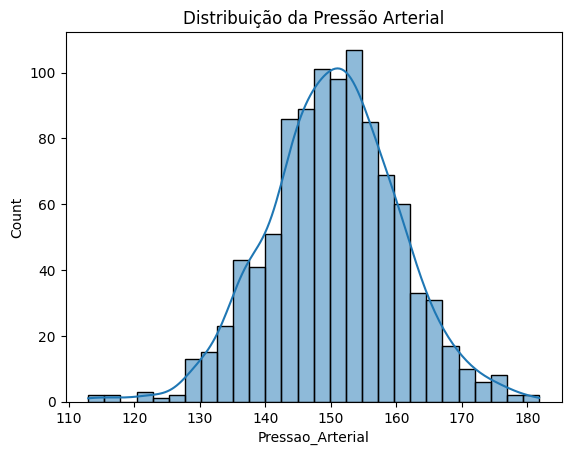

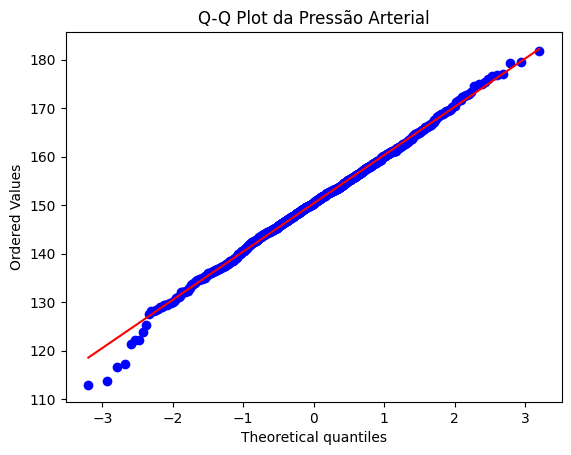

In [26]:
sns.histplot(df_pacientes["Pressao_Arterial"], kde=True)
plt.title("Distribuição da Pressão Arterial")
plt.show()

stats.probplot(df_pacientes["Pressao_Arterial"], dist="norm", plot=plt)
plt.title("Q-Q Plot da Pressão Arterial")
plt.show()
